In [1]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv("train.csv")

# 날짜 컬럼(datetime 형식으로 변환)
train_df['일시'] = pd.to_datetime(train_df['일시'].astype(str), format="%Y%m%d")

In [3]:
# 파생 변수 생성
train_df['year'] = train_df['일시'].dt.year
train_df['month'] = train_df['일시'].dt.month
train_df['day'] = train_df['일시'].dt.day
train_df['weekday'] = train_df['일시'].dt.weekday  # 0: 월요일, 6: 일요일
train_df['is_weekend'] = train_df['weekday'] >= 5

In [4]:
train_df = train_df.rename(columns={
    '광진구': 'Gwangjin',
    '동대문구': 'Dongdaemun',
    '성동구': 'Seongdong',
    '중랑구': 'Jungnang'
})

/tmp/ipython-input-5-481645638.py:11: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-481645638.py:11: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-481645638.py:11: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-481645638.py:11: UserWarning: Glyph 47497 (\N{HANGUL SYLLABLE REUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-481645638.py:11: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-481645638.py:11: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-481645638.py:11: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_l

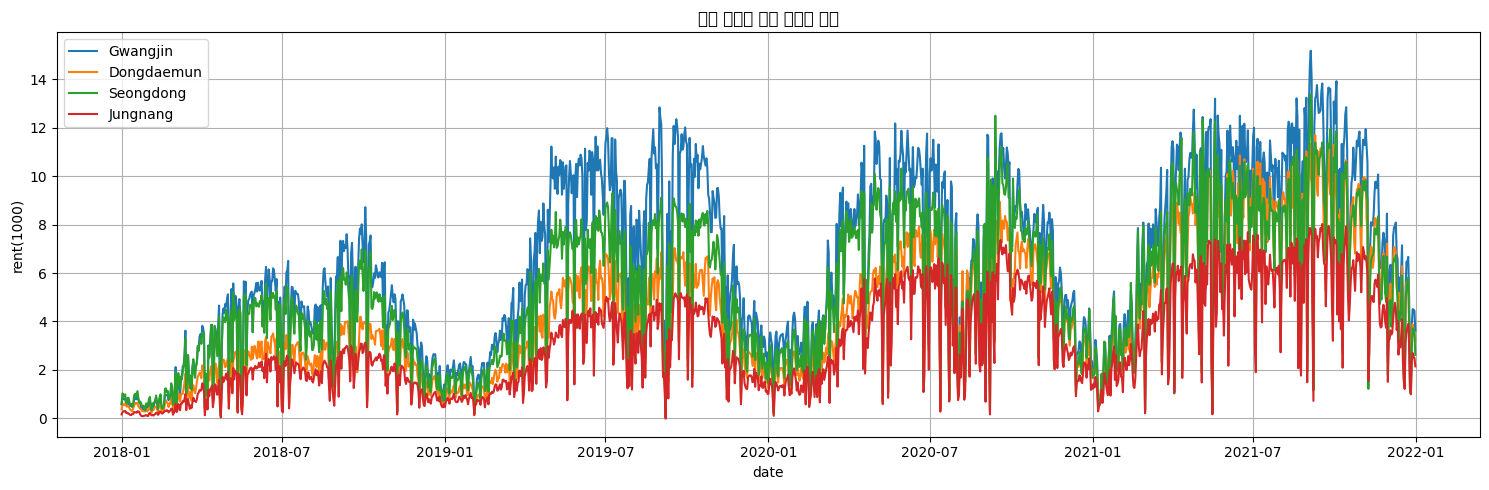

In [5]:
# 구별 대여량 추이 시각화
plt.figure(figsize=(15, 5))
for district in ['Gwangjin', 'Dongdaemun', 'Seongdong', 'Jungnang']:
    plt.plot(train_df['일시'], train_df[district], label=district)
plt.title("구별 따릉이 일별 대여량 추이")
plt.xlabel("date")

plt.ylabel("rent(1000)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

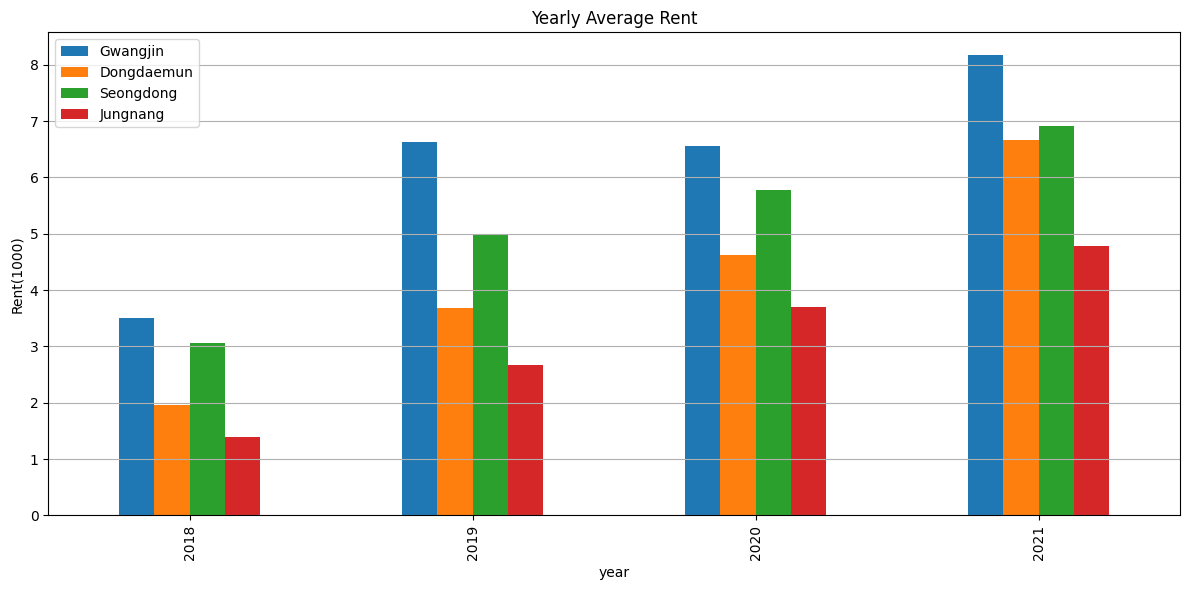

In [6]:
# 연도별 평균 대여량 비교

train_df['year'] = pd.to_datetime(train_df['일시']).dt.year

yearly_avg = train_df.groupby('year')[['Gwangjin', 'Dongdaemun', 'Seongdong', 'Jungnang']].mean()
yearly_avg.plot(kind='bar', figsize=(12, 6), title="Yearly Average Rent")
plt.ylabel("Rent(1000)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

/tmp/ipython-input-7-1061450184.py:7: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-7-1061450184.py:7: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-7-1061450184.py:7: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-7-1061450184.py:7: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-7-1061450184.py:7: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-7-1061450184.py:7: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-7-1061450184.py:7: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  plt.tig

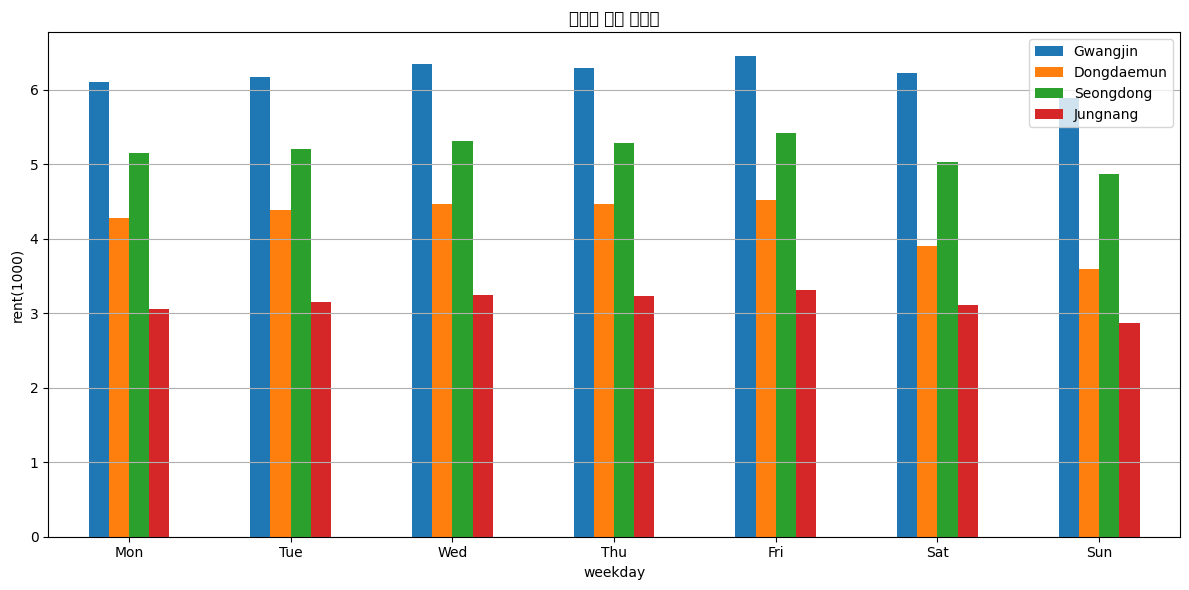

In [7]:
# 요일별 평균 대여량
weekday_avg = train_df.groupby('weekday')[['Gwangjin', 'Dongdaemun', 'Seongdong', 'Jungnang']].mean()
weekday_avg.plot(kind='bar', figsize=(12, 6), title="요일별 평균 대여량")
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.ylabel("rent(1000)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

/tmp/ipython-input-8-2540471551.py:12: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-8-2540471551.py:12: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-8-2540471551.py:12: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-8-2540471551.py:12: UserWarning: Glyph 47568 (\N{HANGUL SYLLABLE MAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-8-2540471551.py:12: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-8-2540471551.py:12: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-8-2540471551.py:12: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  pl

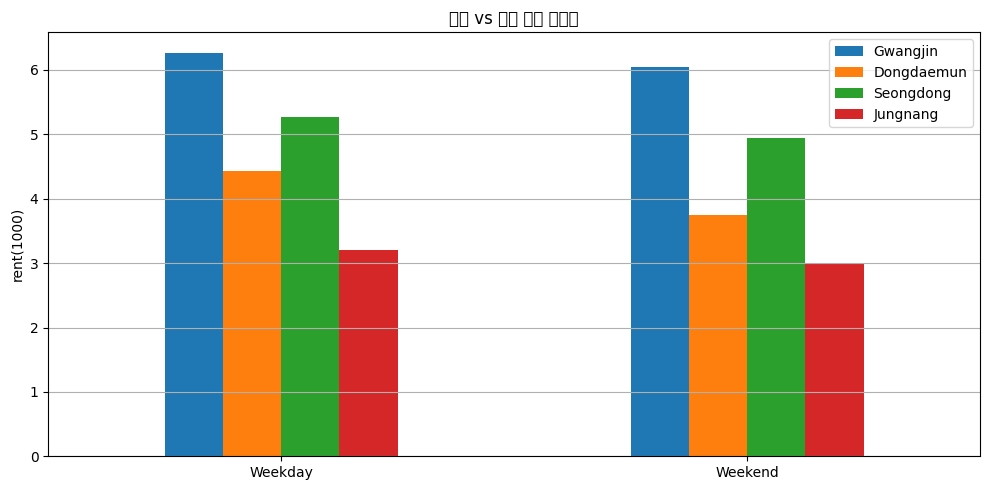

In [8]:
# 평일 vs 주말 평균 대여량

train_df['is_weekend'] = train_df['weekday'].apply(lambda x: 1 if x >= 5 else 0)
weekend_avg = train_df.groupby('is_weekend')[['Gwangjin', 'Dongdaemun', 'Seongdong', 'Jungnang']].mean()

weekend_avg.index = ['Weekday', 'Weekend']

weekend_avg.plot(kind='bar', figsize=(10, 5), title="평일 vs 주말 평균 대여량")
plt.ylabel("rent(1000)")
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipython-input-9-863462190.py:14: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  train_df['is_holiday'] = train_df['일시'].isin(kr_holidays).astype(int)
/tmp/ipython-input-9-863462190.py:30: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-9-863462190.py:30: UserWarning: Glyph 55092 (\N{HANGUL SYLLABLE HYU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-9-863462190.py:30: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-9-863462190.py:30: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-9-863462190.py:30: UserWarning: Glyph 44

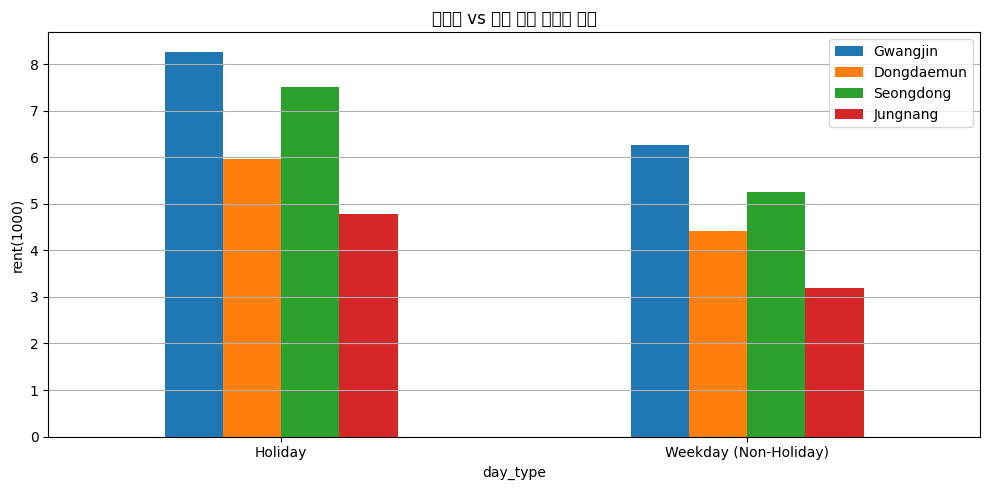

In [9]:
# 공휴일 vs 공휴일이 아닌 평일 평균 비교량
!pip install holidays

import holidays

train_df['일시'] = pd.to_datetime(train_df['일시'], errors='coerce')

years = train_df['일시'].dt.year.unique()
kr_holidays = holidays.KR(years=2018)
kr_holidays = holidays.KR(years=2019)
kr_holidays = holidays.KR(years=2020)
kr_holidays = holidays.KR(years=2021)

train_df['is_holiday'] = train_df['일시'].isin(kr_holidays).astype(int)

holiday_df = train_df[train_df['is_holiday'] == 1].copy()
weekday_non_holiday_df = train_df[(train_df['is_holiday'] == 0) & (train_df['weekday'] < 5)].copy()

holiday_df['day_type'] = 'Holiday'
weekday_non_holiday_df['day_type'] = 'Weekday (Non-Holiday)'

combined_df = pd.concat([holiday_df, weekday_non_holiday_df])

day_type_avg = combined_df.groupby('day_type')[['Gwangjin', 'Dongdaemun', 'Seongdong', 'Jungnang']].mean()

day_type_avg.plot(kind='bar', figsize=(10, 5), title='공휴일 vs 평일 평균 대여량 비교')
plt.ylabel('rent(1000)')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipython-input-10-2778764355.py:6: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-10-2778764355.py:6: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-10-2778764355.py:6: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-10-2778764355.py:6: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-10-2778764355.py:6: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-10-2778764355.py:6: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-10-2778764355.py:6: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
 

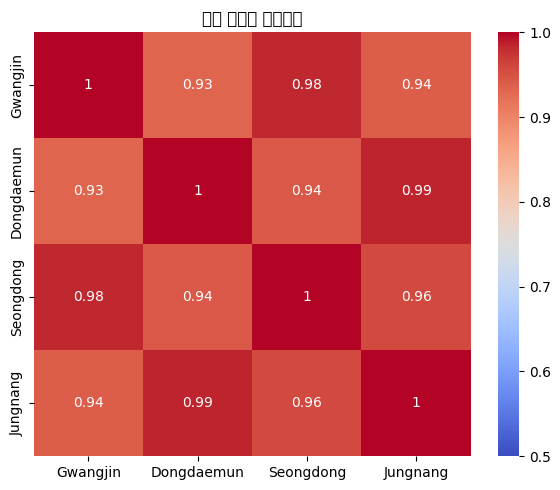

In [10]:
# 구별 대여량 상관관계 히트맵
correlation = train_df[['Gwangjin', 'Dongdaemun', 'Seongdong', 'Jungnang']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=0.5, vmax=1.0)
plt.title("구별 대여량 상관관계")
plt.tight_layout()
plt.show()

In [11]:
# ARIMA

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

In [13]:
train = pd.read_csv('train.csv')

print(f'{len(train)} 개의 행')
print(train.head())

1461 개의 행
         일시    광진구   동대문구    성동구    중랑구
0  20180101  0.592  0.368  0.580  0.162
1  20180102  0.840  0.614  1.034  0.260
2  20180103  0.828  0.576  0.952  0.288
3  20180104  0.792  0.542  0.914  0.292
4  20180105  0.818  0.602  0.994  0.308


In [14]:
train['일시'] = pd.to_datetime(train['일시'], format='%Y%m%d')

initial = ['g', 'd', 's', 'j']
district = list(zip(initial, train.columns.values[1:]))

print("구별 정보:")
for i, (_, d) in enumerate(district):
    print(i, d)

구별 정보:
0 광진구
1 동대문구
2 성동구
3 중랑구


In [15]:
train_g = train.loc[:, ['일시', '광진구']]
train_g.columns = ['ds', 'y']

In [16]:
val_g = train_g[train_g.ds >= '2021-01-01']
train_g = train_g[train_g.ds < '2021-01-01']

print(f"Validation 데이터: {len(val_g)} 개")

Validation 데이터: 365 개


In [17]:
def find_best_arima_params(data, max_p=3, max_d=2, max_q=3):
    """Grid Search를 통한 최적 ARIMA 파라미터 찾기"""
    best_aic = np.inf
    best_params = None

    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(data, order=(p, d, q))
                    fitted_model = model.fit()

                    if fitted_model.aic < best_aic:
                        best_aic = fitted_model.aic
                        best_params = (p, d, q)

                except:
                    continue

    return best_params, best_aic

In [18]:
print("\\n광진구 최적 ARIMA 파라미터 탐색 중...")
best_params, best_aic = find_best_arima_params(train_g['y'])
print(f"최적 파라미터: ARIMA{best_params}, AIC: {best_aic:.2f}")

\n광진구 최적 ARIMA 파라미터 탐색 중...
최적 파라미터: ARIMA(0, 1, 2), AIC: 4239.32


In [19]:
# 모델 훈련
m = ARIMA(train_g['y'], order=best_params)
fitted_model = m.fit()

# 예측
forecast_steps = len(val_g) + 365  # validation + 미래 예측
forecast_result = fitted_model.forecast(steps=forecast_steps)

future_dates = pd.date_range(start='2021-01-01', periods=forecast_steps, freq='D')
forecast_df = pd.DataFrame({
    'ds': future_dates,
    'yhat': forecast_result
})

forecast_df['yhat'] = np.where(forecast_df['yhat'] < 0, 0, forecast_df['yhat'])

print("\\n예측 결과:")
print(forecast_df.head())

\n예측 결과:
             ds      yhat
1096 2021-01-01  3.023963
1097 2021-01-02  3.192112
1098 2021-01-03  3.192112
1099 2021-01-04  3.192112
1100 2021-01-05  3.192112


In [20]:
fitted_values = fitted_model.fittedvalues
train_comparison = pd.DataFrame({
    'ds': train_g['ds'],
    'y': train_g['y'],
    'yhat': fitted_values
})

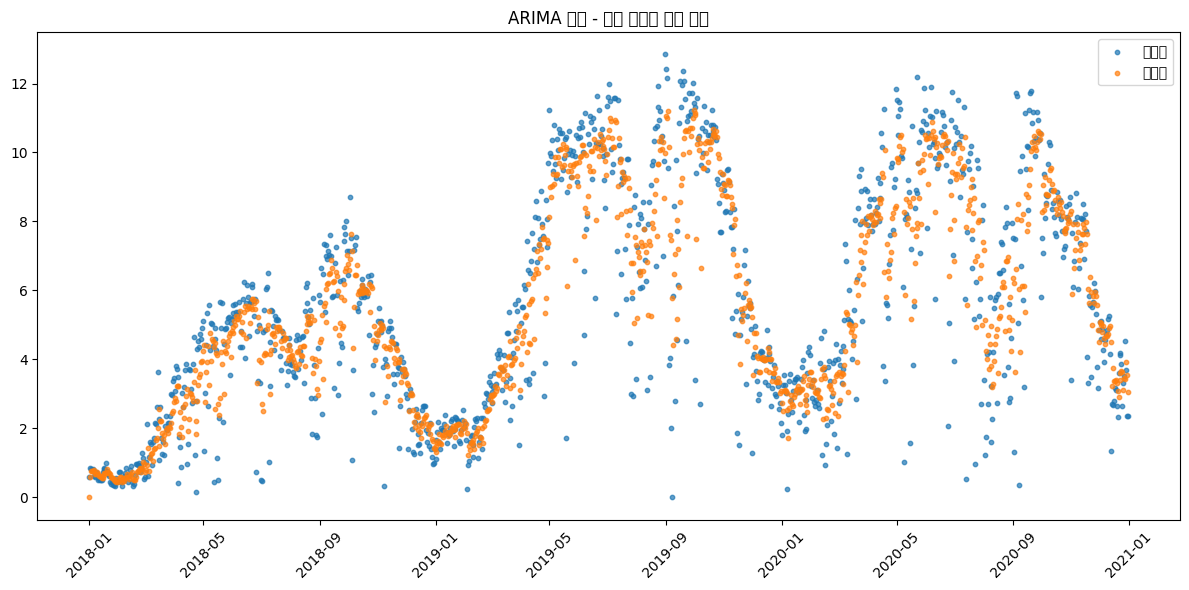

In [21]:
plt.figure(figsize=(12, 6))
plt.scatter(train_comparison['ds'], train_comparison['y'], s=10, alpha=0.7, label='실제값')
plt.scatter(train_comparison['ds'], train_comparison['yhat'], s=10, alpha=0.7, label='예측값')
plt.title('ARIMA 모델 - 훈련 데이터 적합 결과')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
val_forecast = forecast_df[forecast_df['ds'] < '2022-01-01']
val_comparison = val_forecast.merge(val_g, on='ds', how='left')

print(f"\\nValidation MSE: {((val_comparison['yhat'] - val_comparison['y'])**2).mean():.6f}")

\nValidation MSE: 37.233245


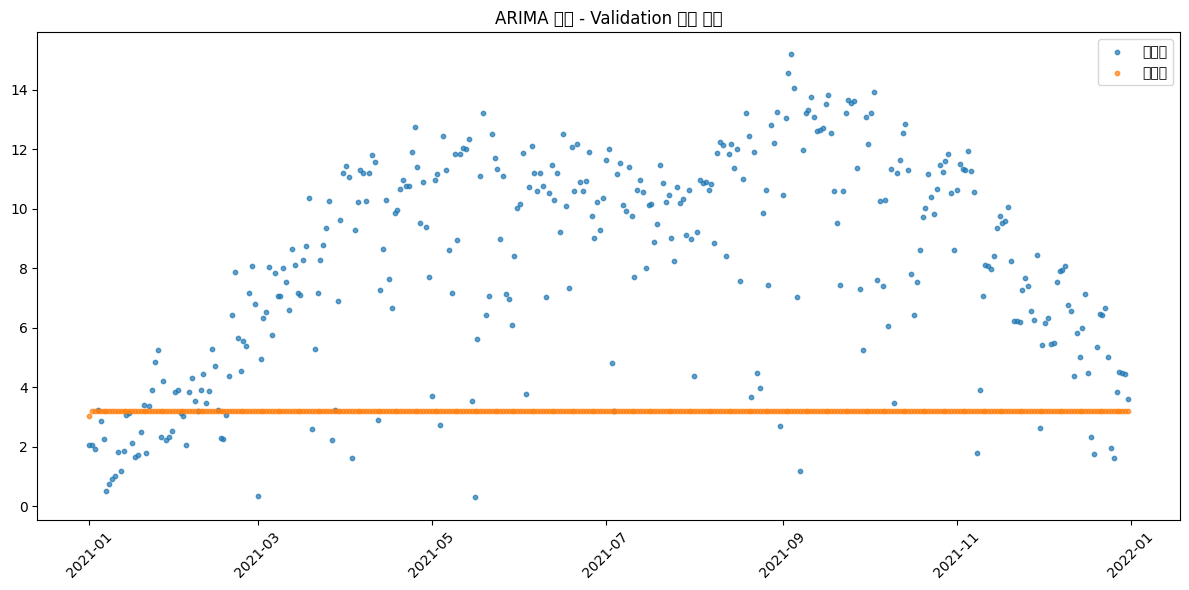

In [23]:
plt.figure(figsize=(12, 6))
plt.scatter(val_comparison['ds'], val_comparison['y'], s=10, alpha=0.7, label='실제값')
plt.scatter(val_comparison['ds'], val_comparison['yhat'], s=10, alpha=0.7, label='예측값')
plt.title('ARIMA 모델 - Validation 예측 결과')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

보정 후 Validation MSE: 14.152363


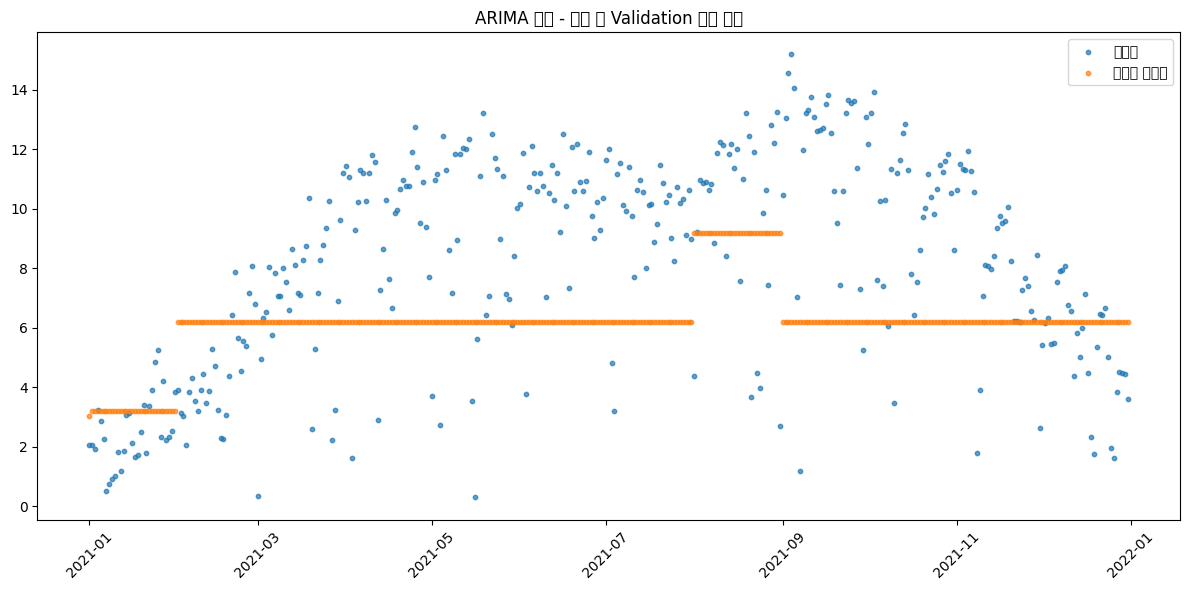

In [52]:
month_winter = [1]
month_summer = [8]

def consider_month(x):
    if x['ds'].month in month_winter:
        return x['yhat']
    elif x['ds'].month in month_summer:
        return x['yhat'] + 6
    else:
        return x['yhat'] + 3

val_comparison['yhat_adjusted'] = val_comparison.apply(lambda x: consider_month(x), axis=1)
val_comparison['se_adjusted'] = (val_comparison['yhat_adjusted'] - val_comparison['y'])**2

print(f"보정 후 Validation MSE: {val_comparison['se_adjusted'].mean():.6f}")

plt.figure(figsize=(12, 6))
plt.scatter(val_comparison['ds'], val_comparison['y'], s=10, alpha=0.7, label='실제값')
plt.scatter(val_comparison['ds'], val_comparison['yhat_adjusted'], s=10, alpha=0.7, label='보정된 예측값')
plt.title('ARIMA 모델 - 보정 후 Validation 예측 결과')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
# 최적 ARIMA 모델 생성

def train_test_split(train_d, date: str):
    train_d.columns = ['ds', 'y']

    val_d = train_d[train_d.ds >= date]
    train_d = train_d[train_d.ds < date]

    return train_d, val_d

def make_arima_model(data, max_p=3, max_d=2, max_q=3):
    best_params, _ = find_best_arima_params(data, max_p, max_d, max_q)

    model = ARIMA(data, order=best_params)
    fitted_model = model.fit()

    return fitted_model, best_params

def mae():
    val_forecast = forecast_df[forecast_df['ds'] < '2022-01-01']
    t = val_forecast.merge(val_d, on='ds', how='left')

    t['yhat'] = t.apply(lambda x: consider_month(x), axis=1)
    t['ae'] = np.abs(t['yhat'] - t['y'])

    return t['ae'].mean()

def plot_forecast():
    # 훈련 데이터 적합값
    fitted_values = fitted_model.fittedvalues
    train_comparison = pd.DataFrame({
        'ds': train_d['ds'],
        'y': train_d['y'],
        'yhat': fitted_values
    })

    train_comparison['yhat'] = train_comparison.apply(lambda x: consider_month(x), axis=1)

    ax.scatter(train_comparison['ds'], train_comparison['y'], s=10, alpha=0.7, label='실제값')
    ax.scatter(train_comparison['ds'], train_comparison['yhat'], s=10, alpha=0.7, label='예측값')
    ax.set_title(f'{d} - ARIMA 모델 예측')
    ax.legend()

def sub_predict():
    future_forecast = forecast_df[forecast_df['ds'] >= '2022-01-01']
    future_forecast['yhat'] = future_forecast.apply(lambda x: consider_month(x), axis=1)

    sample_submission[d] = future_forecast['yhat'].values[:len(sample_submission)]

In [31]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv


\n 모든 구에 대해 ARIMA 모델 적용
\n광진구 처리 중...
광진구 최적 파라미터: ARIMA(0, 1, 2)
광진구: MAE 3.165960
\n동대문구 처리 중...
동대문구 최적 파라미터: ARIMA(2, 1, 1)
동대문구: MAE 2.303446
\n성동구 처리 중...
성동구 최적 파라미터: ARIMA(2, 1, 1)
성동구: MAE 2.494461
\n중랑구 처리 중...
중랑구 최적 파라미터: ARIMA(2, 1, 1)
중랑구: MAE 1.564653


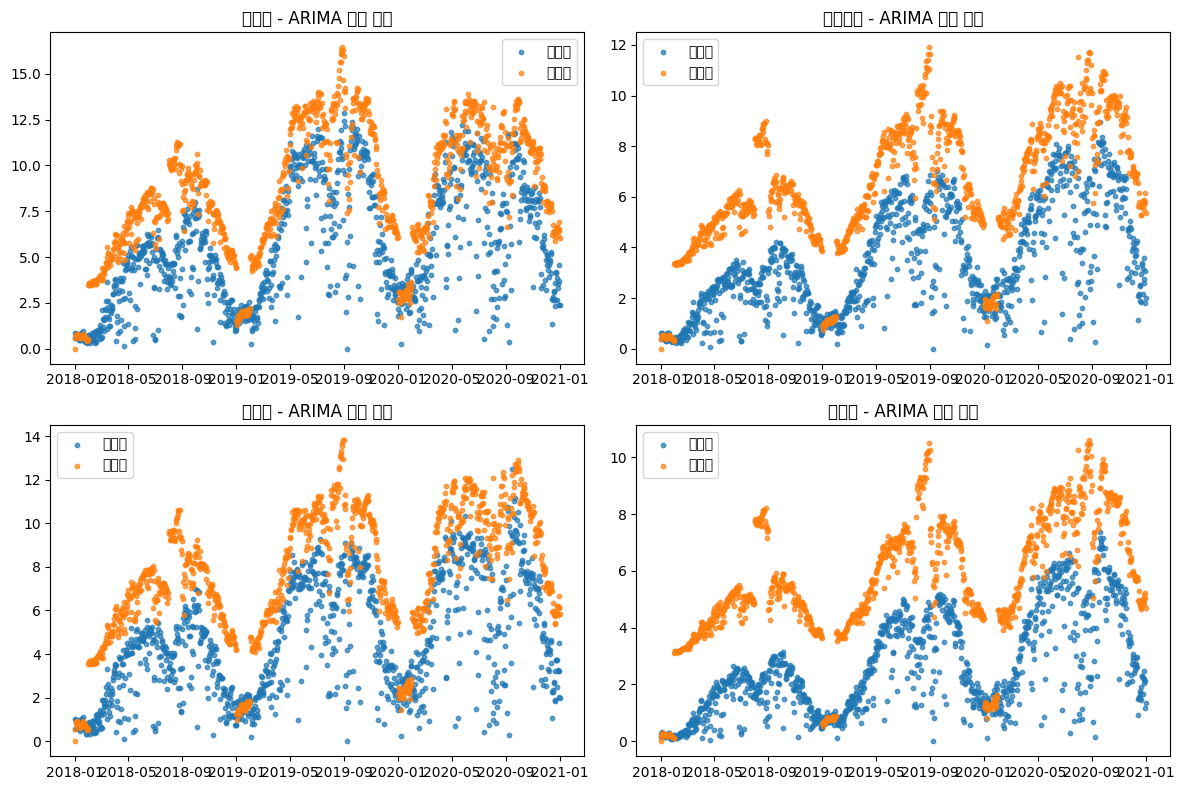

In [32]:
# 모든 구에 대해 ARIMA 모델 적용

sample_submission = pd.read_csv('sample_submission.csv')
print("\\n 모든 구에 대해 ARIMA 모델 적용")

fig = plt.figure(figsize=(12, 8))

for i, (_, d) in enumerate(district):

    ax = fig.add_subplot(2, 2, i+1)

    print(f"\\n{d} 처리 중...")

    train_d = train.loc[:, ['일시', d]]

    train_d, val_d = train_test_split(train_d, '2021-01-01')

    fitted_model, best_params = make_arima_model(train_d['y'])

    print(f"{d} 최적 파라미터: ARIMA{best_params}")

    forecast_steps = len(val_d) + 365  # validation + 미래 예측
    forecast_result = fitted_model.forecast(steps=forecast_steps)

    future_dates = pd.date_range(start='2021-01-01', periods=forecast_steps, freq='D')
    forecast_df = pd.DataFrame({
        'ds': future_dates,
        'yhat': forecast_result
    })

    forecast_df['yhat'] = np.where(forecast_df['yhat'] < 0, 0, forecast_df['yhat'])

    metric = mae()
    print(f'{d}: MAE {metric:.6f}')

    plot_forecast()

    sub_predict()

plt.tight_layout()
plt.show()

In [65]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

districts = ['광진구', '성동구', '동대문구', '중랑구']
forecast_steps = 365

all_forecast_dfs = []

for district in districts:
    print(f"{district} 처리 중...")

    # 데이터 준비
    train_d = train[['일시', district]].copy()
    train_d['일시'] = pd.to_datetime(train_d['일시'])
    train_d.set_index('일시', inplace=True)
    train_d = train_d.rename(columns={district: 'y'})

    # ARIMA 모델 적합 (p,d,q = 예시: (2,1,2))
    model = ARIMA(train_d['y'], order=(2,1,2))
    fitted_model = model.fit()

    # 예측 수행
    forecast_result = fitted_model.forecast(steps=forecast_steps)

    # 날짜 생성
    forecast_dates = pd.date_range(start='2022-01-01', periods=forecast_steps, freq='D')

    # DataFrame 생성, 음수 제거
    forecast_df = pd.DataFrame({
        'ds': forecast_dates,
        'yhat': forecast_result.clip(lower=0)
    })

    # 지역명 추가
    forecast_df['district'] = district

    # 개별 파일 저장
    forecast_df.to_csv(f'ARIMA_예측결과_{district}.csv', index=False)

    all_forecast_dfs.append(forecast_df)

total_forecast = pd.concat(all_forecast_dfs, ignore_index=True)
total_forecast.to_csv('ARIMA_예측결과_전체지역.csv', index=False)

광진구 처리 중...
성동구 처리 중...
동대문구 처리 중...
중랑구 처리 중...


In [34]:
print(sample_submission.head())
print(f"\\n제출 파일 크기: {sample_submission.shape}")

print("\\n=== 각 구별 예측값 통계 ===")
for district_name in ['광진구', '동대문구', '성동구', '중랑구']:
    stats = sample_submission[district_name].describe()
    print(f"\\n{district_name}:")
    print(f"  평균: {stats['mean']:.3f}")
    print(f"  표준편차: {stats['std']:.3f}")
    print(f"  최소값: {stats['min']:.3f}")
    print(f"  최대값: {stats['max']:.3f}")

print("\\nARIMA 모델 예측 완료")

         일시       광진구      동대문구       성동구       중랑구
0  20220101  3.192112  2.577644  2.862102  1.793313
1  20220102  3.192112  2.577644  2.862102  1.793313
2  20220103  3.192112  2.577644  2.862102  1.793313
3  20220104  3.192112  2.577644  2.862102  1.793313
4  20220105  3.192112  2.577644  2.862102  1.793313
\n제출 파일 크기: (334, 5)
\n=== 각 구별 예측값 통계 ===
\n광진구:
  평균: 6.192
  표준편차: 1.294
  최소값: 3.192
  최대값: 9.192
\n동대문구:
  평균: 5.578
  표준편차: 1.294
  최소값: 2.578
  최대값: 8.578
\n성동구:
  평균: 5.862
  표준편차: 1.294
  최소값: 2.862
  최대값: 8.862
\n중랑구:
  평균: 4.793
  표준편차: 1.294
  최소값: 1.793
  최대값: 7.793
\nARIMA 모델 예측 완료


In [36]:
# SARIMA

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
import itertools

In [37]:
# 계절성 분석

def analyze_seasonality(data, freq=7):
    """시계열 데이터의 계절성 분석"""
    try:
        # 계절성 분해
        decomposition = seasonal_decompose(data, model='additive', period=freq)

        # 계절성 강도 측정
        seasonal_strength = np.var(decomposition.seasonal) / np.var(decomposition.resid + decomposition.seasonal)

        return decomposition, seasonal_strength
    except:
        return None, 0

In [46]:
# SARIMA 최적 파라미터 탐색 함수

def find_best_sarima_params(data, seasonal_period=7, max_order=2):
    """Grid Search를 통한 최적 SARIMA 파라미터 찾기"""

    # 범위 설정
    p = d = q = range(0, max_order + 1)
    seasonal_p = seasonal_d = seasonal_q = range(0, 2)

    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = list(itertools.product(seasonal_p, seasonal_d, seasonal_q))

    best_aic = np.inf
    best_params = None
    best_seasonal_params = None

    print(f"SARIMA 파라미터 탐색 중... (총 {len(pdq) * len(seasonal_pdq)}개 조합)")

    for param in pdq:
        for seasonal_param in seasonal_pdq:
            try:
                model = SARIMAX(data,
                               order=param,
                               seasonal_order=seasonal_param + (seasonal_period,),
                               enforce_stationarity=False,
                               enforce_invertibility=False)

                fitted_model = model.fit(disp=False)

                if fitted_model.aic < best_aic:
                    best_aic = fitted_model.aic
                    best_params = param
                    best_seasonal_params = seasonal_param

            except:
                continue

    return best_params, best_seasonal_params, best_aic

In [47]:
# SARIMA 모델 클래스

class ImprovedSARIMA:
    def __init__(self, seasonal_period=7):
        self.seasonal_period = seasonal_period
        self.model = None
        self.fitted_model = None
        self.best_params = None
        self.best_seasonal_params = None

    def fit(self, data):
        self.best_params, self.best_seasonal_params, best_aic = find_best_sarima_params(
            data, self.seasonal_period
        )

        print(f"최적 SARIMA 파라미터: {self.best_params}")
        print(f"최적 계절성 파라미터: {self.best_seasonal_params}")
        print(f"최적 AIC: {best_aic:.2f}")

        self.model = SARIMAX(data,
                           order=self.best_params,
                           seasonal_order=self.best_seasonal_params + (self.seasonal_period,),
                           enforce_stationarity=False,
                           enforce_invertibility=False)

        self.fitted_model = self.model.fit(disp=False)

        return self

    def forecast(self, steps):
        """예측 수행"""
        if self.fitted_model is None:
            raise ValueError("모델이 훈련되지 않았습니다.")

        forecast_result = self.fitted_model.forecast(steps=steps)
        return forecast_result

    def get_fitted_values(self):
        """훈련 데이터 적합값 반환"""
        if self.fitted_model is None:
            raise ValueError("모델이 훈련되지 않았습니다.")

        return self.fitted_model.fittedvalues

In [48]:
# 앙상블 예측 함수

def ensemble_forecast(arima_pred, sarima_pred, weights=[0.4, 0.6]):
    """ARIMA와 SARIMA 예측 결과를 앙상블"""
    return weights[0] * arima_pred + weights[1] * sarima_pred

In [49]:
# 성능 평가 함수

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n{model_name} 성능:")
    print(f"  MAE: {mae:.6f}")
    print(f"  MSE: {mse:.6f}")
    print(f"  RMSE: {rmse:.6f}")

    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse}


계절성 분석 중...
계절성 강도: 0.0106

SARIMA 모델 훈련 중...
SARIMA 파라미터 탐색 중... (총 216개 조합)
최적 SARIMA 파라미터: (1, 0, 2)
최적 계절성 파라미터: (0, 1, 1)
최적 AIC: 4210.93

ARIMA (보정) 성능:
  MAE: 3.165960
  MSE: 14.152363
  RMSE: 3.761963

SARIMA (보정) 성능:
  MAE: 2.494864
  MSE: 9.132028
  RMSE: 3.021925

앙상블 성능:
  MAE: 2.645341
  MSE: 10.088111
  RMSE: 3.176179

전체 데이터 기간: 2018-01-01 00:00:00 ~ 2021-12-31 00:00:00
훈련 데이터 기간: 2018-01-01 00:00:00 ~ 2020-12-31 00:00:00
검증 데이터 기간: 2021-01-01 00:00:00 ~ 2021-12-31 00:00:00


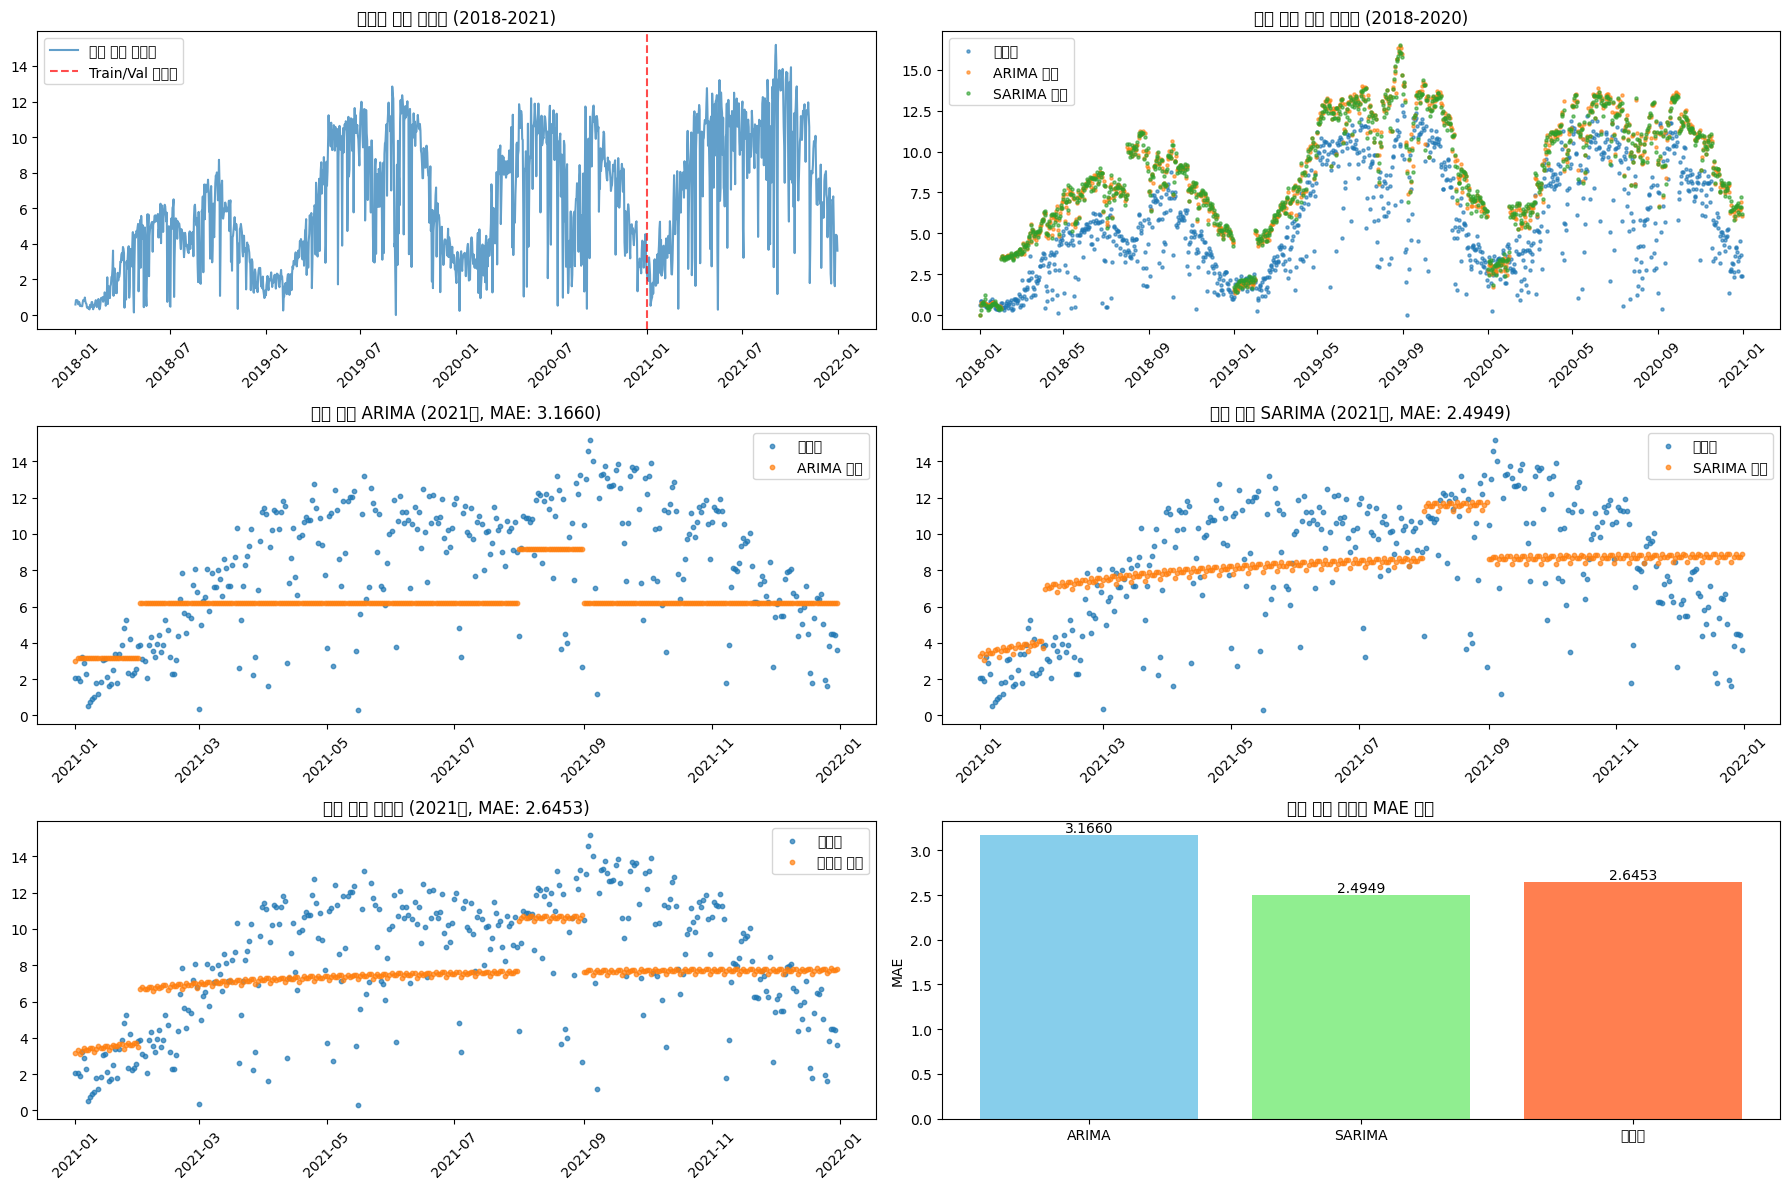

In [57]:
# SARIMA 모델 테스트(광진구)

train_g = train.loc[:, ['일시', '광진구']]
train_g.columns = ['ds', 'y']

val_g = train_g[train_g.ds >= '2021-01-01']
train_g = train_g[train_g.ds < '2021-01-01']

# 계절성 분석
print("\n계절성 분석 중...")
decomposition, seasonal_strength = analyze_seasonality(train_g['y'], freq=7)
print(f"계절성 강도: {seasonal_strength:.4f}")

# SARIMA 모델 훈련
print("\nSARIMA 모델 훈련 중...")
sarima_model = ImprovedSARIMA(seasonal_period=7)
sarima_model.fit(train_g['y'])

# 예측
forecast_steps = len(val_g) + 365
sarima_forecast = sarima_model.forecast(forecast_steps)

# 음수값 처리
sarima_forecast = np.where(sarima_forecast < 0, 0, sarima_forecast)

# 예측 결과 DataFrame
future_dates = pd.date_range(start='2021-01-01', periods=forecast_steps, freq='D')
sarima_forecast_df = pd.DataFrame({
    'ds': future_dates,
    'yhat': sarima_forecast # Changed 'yhat_sarima' to 'yhat' for consistency with consider_month
})

# 検証データと比較
val_sarima = sarima_forecast_df[sarima_forecast_df['ds'] < '2022-01-01']
val_comparison_sarima = val_sarima.merge(val_g, on='ds', how='left')

# ARIMA 모델 훈련 (광진구) and 예측
arima_model_g = ARIMA(train_g['y'], order=(0, 1, 2)) # Using best params from previous ARIMA cell
fitted_model_g = arima_model_g.fit()
arima_forecast_g = fitted_model_g.forecast(steps=forecast_steps)
arima_forecast_g = np.where(arima_forecast_g < 0, 0, arima_forecast_g)

arima_forecast_df_g = pd.DataFrame({
    'ds': future_dates,
    'yhat': arima_forecast_g
})

val_forecast_arima = arima_forecast_df_g[arima_forecast_df_g['ds'] < '2022-01-01'].copy()
val_comparison_arima = val_forecast_arima.merge(val_g, on='ds', how='left')


# 보정 함수 적용
val_comparison_arima['yhat_adjusted'] = val_comparison_arima.apply(lambda x: consider_month(x), axis=1)
val_comparison_sarima['yhat_adjusted'] = val_comparison_sarima.apply(lambda x: consider_month(x), axis=1) # Simplified apply


# 성능 평가
arima_performance = evaluate_model(val_comparison_arima['y'], val_comparison_arima['yhat_adjusted'], "ARIMA (보정)")
sarima_performance = evaluate_model(val_comparison_sarima['y'], val_comparison_sarima['yhat_adjusted'], "SARIMA (보정)")

# 앙상블 예측
val_comparison_ensemble = val_comparison_arima.copy()
val_comparison_ensemble['yhat_ensemble'] = ensemble_forecast(
    val_comparison_arima['yhat_adjusted'],
    val_comparison_sarima['yhat_adjusted']
)

ensemble_performance = evaluate_model(val_comparison_ensemble['y'], val_comparison_ensemble['yhat_ensemble'], "앙상블")

# 전체 데이터 시각화
print(f"\n전체 데이터 기간: {train['일시'].min()} ~ {train['일시'].max()}")
print(f"훈련 데이터 기간: {train_g['ds'].min()} ~ {train_g['ds'].max()}")
print(f"검증 데이터 기간: {val_g['ds'].min()} ~ {val_g['ds'].max()}")

fig, axes = plt.subplots(3, 2, figsize=(18, 12))

original_data = train.loc[:, ['일시', '광진구']].copy()
original_data.columns = ['ds', 'y']

axes[0, 0].plot(original_data['ds'], original_data['y'], alpha=0.7, label='전체 원본 데이터')
axes[0, 0].axvline(x=pd.to_datetime('2021-01-01'), color='red', linestyle='--', alpha=0.7, label='Train/Val 분할점')
axes[0, 0].set_title('광진구 전체 데이터 (2018-2021)')
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# 모델 적합도
train_fitted_arima = pd.DataFrame({
    'ds': train_g['ds'],
    'y': train_g['y'],
    'yhat': fitted_model_g.fittedvalues # Changed to fitted_model_g
})
train_fitted_arima['yhat_adjusted'] = train_fitted_arima.apply(lambda x: consider_month(x), axis=1)

train_fitted_sarima = pd.DataFrame({
    'ds': train_g['ds'],
    'y': train_g['y'],
    'yhat': sarima_model.get_fitted_values()
})
train_fitted_sarima['yhat_adjusted'] = train_fitted_sarima.apply(lambda x: consider_month(x), axis=1)

axes[0, 1].scatter(train_fitted_arima['ds'], train_fitted_arima['y'], s=5, alpha=0.6, label='실제값')
axes[0, 1].scatter(train_fitted_arima['ds'], train_fitted_arima['yhat_adjusted'], s=5, alpha=0.6, label='ARIMA 적합')
axes[0, 1].scatter(train_fitted_sarima['ds'], train_fitted_sarima['yhat_adjusted'], s=5, alpha=0.6, label='SARIMA 적합')
axes[0, 1].set_title('훈련 기간 모델 적합도 (2018-2020)')
axes[0, 1].legend()
axes[0, 1].tick_params(axis='x', rotation=45)

# 예측 성능
axes[1, 0].scatter(val_comparison_arima['ds'], val_comparison_arima['y'], s=10, alpha=0.7, label='실제값')
axes[1, 0].scatter(val_comparison_arima['ds'], val_comparison_arima['yhat_adjusted'], s=10, alpha=0.7, label='ARIMA 예측')
axes[1, 0].set_title(f'검증 기간 ARIMA (2021년, MAE: {arima_performance["MAE"]:.4f})')
axes[1, 0].legend()
axes[1, 0].tick_params(axis='x', rotation=45)

axes[1, 1].scatter(val_comparison_sarima['ds'], val_comparison_sarima['y'], s=10, alpha=0.7, label='실제값')
axes[1, 1].scatter(val_comparison_sarima['ds'], val_comparison_sarima['yhat_adjusted'], s=10, alpha=0.7, label='SARIMA 예측')
axes[1, 1].set_title(f'검증 기간 SARIMA (2021년, MAE: {sarima_performance["MAE"]:.4f})')
axes[1, 1].legend()
axes[1, 1].tick_params(axis='x', rotation=45)

# 앙상블
axes[2, 0].scatter(val_comparison_ensemble['ds'], val_comparison_ensemble['y'], s=10, alpha=0.7, label='실제값')
axes[2, 0].scatter(val_comparison_ensemble['ds'], val_comparison_ensemble['yhat_ensemble'], s=10, alpha=0.7, label='앙상블 예측')
axes[2, 0].set_title(f'검증 기간 앙상블 (2021년, MAE: {ensemble_performance["MAE"]:.4f})')
axes[2, 0].legend()
axes[2, 0].tick_params(axis='x', rotation=45)

# 성능 비교
models = ['ARIMA', 'SARIMA', '앙상블']
mae_scores = [arima_performance['MAE'], sarima_performance['MAE'], ensemble_performance['MAE']]

axes[2, 1].bar(models, mae_scores, color=['skyblue', 'lightgreen', 'coral'])
axes[2, 1].set_title('검증 기간 모델별 MAE 비교')
axes[2, 1].set_ylabel('MAE')

for i, v in enumerate(mae_scores):
    axes[2, 1].text(i, v + 0.001, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Gwangjin SARIMA 모델 처리 중...
SARIMA 파라미터 탐색 중... (총 216개 조합)
최적 SARIMA 파라미터: (1, 0, 2)
최적 계절성 파라미터: (0, 1, 1)
최적 AIC: 4210.93
Gwangjin SARIMA MAE: 2.494864

Dongdaemun SARIMA 모델 처리 중...
SARIMA 파라미터 탐색 중... (총 216개 조합)
최적 SARIMA 파라미터: (2, 1, 2)
최적 계절성 파라미터: (0, 1, 1)
최적 AIC: 3087.25
Dongdaemun SARIMA MAE: 2.535441

Seongdong SARIMA 모델 처리 중...
SARIMA 파라미터 탐색 중... (총 216개 조합)
최적 SARIMA 파라미터: (1, 0, 2)
최적 계절성 파라미터: (0, 1, 1)
최적 AIC: 3866.45
Seongdong SARIMA MAE: 2.228622

Jungnang SARIMA 모델 처리 중...
SARIMA 파라미터 탐색 중... (총 216개 조합)
최적 SARIMA 파라미터: (2, 1, 2)
최적 계절성 파라미터: (0, 1, 1)
최적 AIC: 2580.56
Jungnang SARIMA MAE: 1.608302


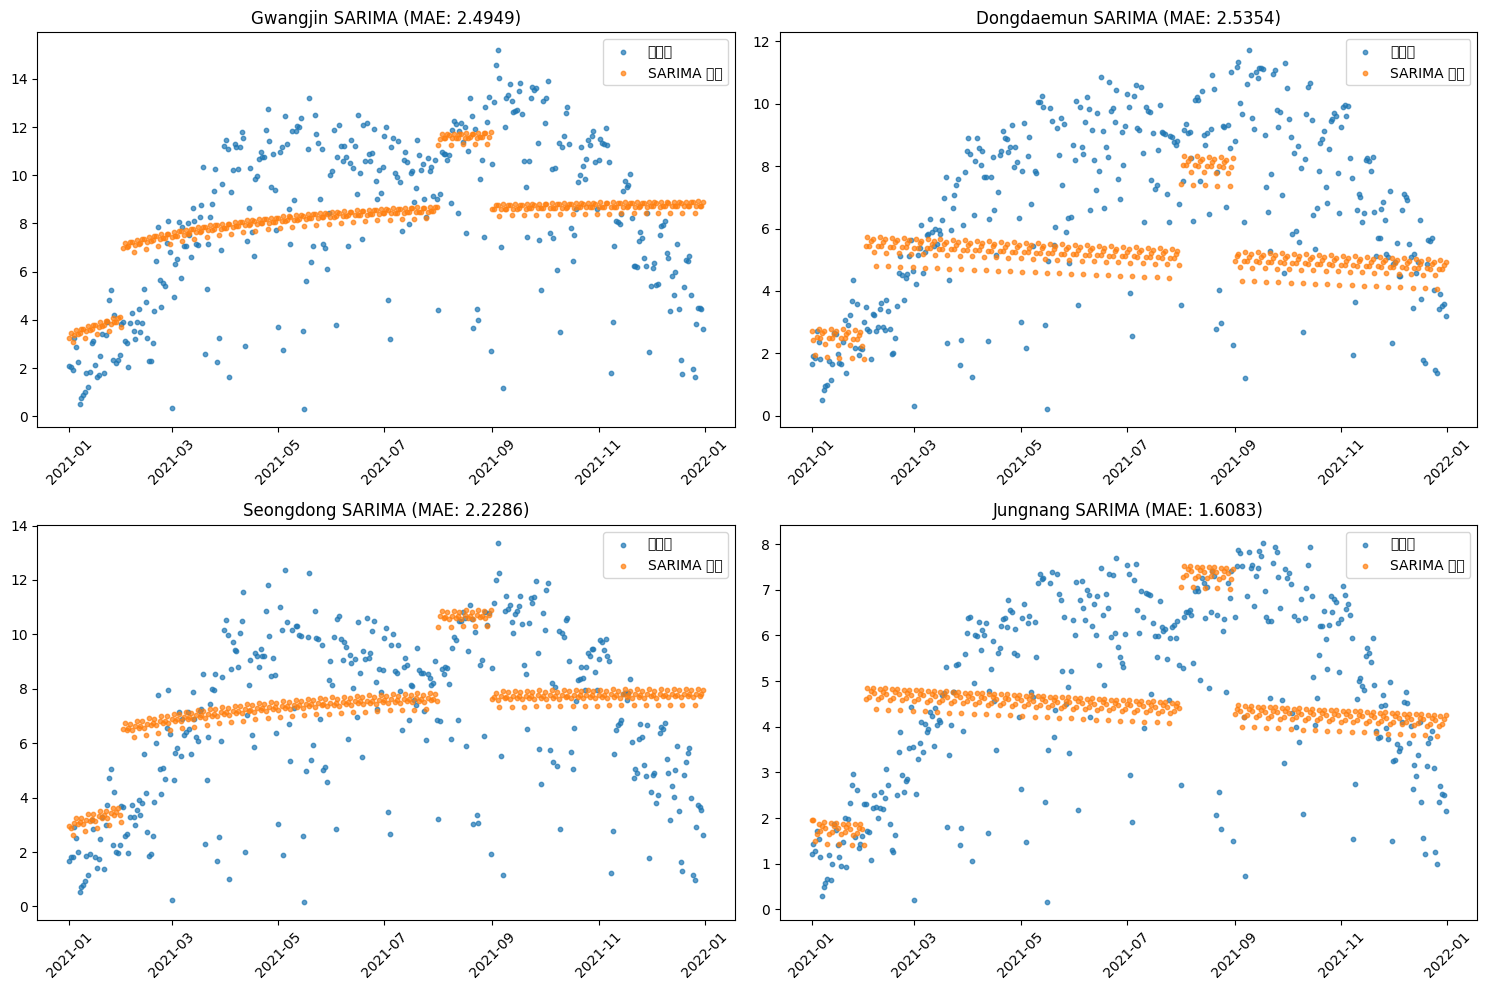

In [60]:
# 모든 구에 SARIMA 적용

results = {}
sarima_submission = sample_submission.copy()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

districts_to_process = ['Gwangjin', 'Dongdaemun', 'Seongdong', 'Jungnang']

for i, d in enumerate(districts_to_process):
    print(f"\n{d} SARIMA 모델 처리 중...")

    # Rename columns to English names within the loop
    train_renamed = train.rename(columns={
        '광진구': 'Gwangjin',
        '동대문구': 'Dongdaemun',
        '성동구': 'Seongdong',
        '중랑구': 'Jungnang'
    })

    train_d = train_renamed.loc[:, ['일시', d]]
    train_d.columns = ['ds', 'y']

    val_d = train_d[train_d.ds >= '2021-01-01'].copy()
    train_d = train_d[train_d.ds < '2021-01-01'].copy()


    # SARIMA 모델 훈련
    sarima_model = ImprovedSARIMA(seasonal_period=7)
    sarima_model.fit(train_d['y'])

    # 예측
    forecast_steps = len(val_d) + 365
    sarima_forecast = sarima_model.forecast(forecast_steps)
    sarima_forecast = np.where(sarima_forecast < 0, 0, sarima_forecast)

    # 예측 결과 DataFrame
    future_dates = pd.date_range(start='2021-01-01', periods=forecast_steps, freq='D')
    district_forecast_df = pd.DataFrame({
        'ds': future_dates,
        'yhat': sarima_forecast
    })

    # 검증 및 성능 평가
    val_forecast = district_forecast_df[district_forecast_df['ds'] < '2022-01-01']
    val_comparison = val_forecast.merge(val_d, on='ds', how='left')

    # 월별 보정 적용
    val_comparison['yhat_adjusted'] = val_comparison.apply(lambda x: consider_month(x), axis=1)

    # 성능 계산
    mae_score = mean_absolute_error(val_comparison['y'], val_comparison['yhat_adjusted'])
    results[d] = {'MAE': mae_score}

    print(f'{d} SARIMA MAE: {mae_score:.6f}')

    # 시각화
    ax = axes[i//2, i%2]
    ax.scatter(val_comparison['ds'], val_comparison['y'], s=10, alpha=0.7, label='실제값')
    ax.scatter(val_comparison['ds'], val_comparison['yhat_adjusted'], s=10, alpha=0.7, label='SARIMA 예측')
    ax.set_title(f'{d} SARIMA (MAE: {mae_score:.4f})')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

    future_forecast = district_forecast_df[district_forecast_df['ds'] >= '2022-01-01']
    future_forecast['yhat_adjusted'] = future_forecast.apply(lambda x: consider_month(x), axis=1)

    # Use the correct column names for sample_submission
    korean_district_name = {
        'Gwangjin': '광진구',
        'Dongdaemun': '동대문구',
        'Seongdong': '성동구',
        'Jungnang': '중랑구'
    }[d]
    sarima_submission[korean_district_name] = future_forecast['yhat_adjusted'].values[:len(sample_submission)]


plt.tight_layout()
plt.show()

In [64]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

districts = ['광진구', '성동구', '동대문구', '중랑구']
forecast_steps = 365  # 예측 기간

all_forecast_dfs = []

for district in districts:
    print(f"{district} 처리 중...")

    train_d = train[['일시', district]].copy()
    train_d['일시'] = pd.to_datetime(train_d['일시'])
    train_d.set_index('일시', inplace=True)
    train_d = train_d.rename(columns={district: 'y'})

    model = SARIMAX(train_d['y'], order=(1,1,1), seasonal_order=(1,1,1,12))
    fitted_model = model.fit(disp=False)

    forecast_result = fitted_model.forecast(steps=forecast_steps)

    forecast_dates = pd.date_range(start='2022-01-01', periods=forecast_steps, freq='D')

    forecast_df = pd.DataFrame({
        'ds': forecast_dates,
        'yhat': forecast_result.clip(lower=0)
    })

    forecast_df['district'] = district

    forecast_df.to_csv(f'SARIMA_예측결과_{district}.csv', index=False)

    all_forecast_dfs.append(forecast_df)

total_forecast = pd.concat(all_forecast_dfs, ignore_index=True)
total_forecast.to_csv('SARIMA_예측결과_전체지역.csv', index=False)


광진구 처리 중...
성동구 처리 중...
동대문구 처리 중...
중랑구 처리 중...


전체 데이터 기간: 2018-01-01 00:00:00 ~ 2021-12-31 00:00:00
훈련 데이터 기간: 2018-01-01 00:00:00 ~ 2020-12-31 00:00:00
검증 데이터 기간: 2021-01-01 00:00:00 ~ 2021-12-31 00:00:00


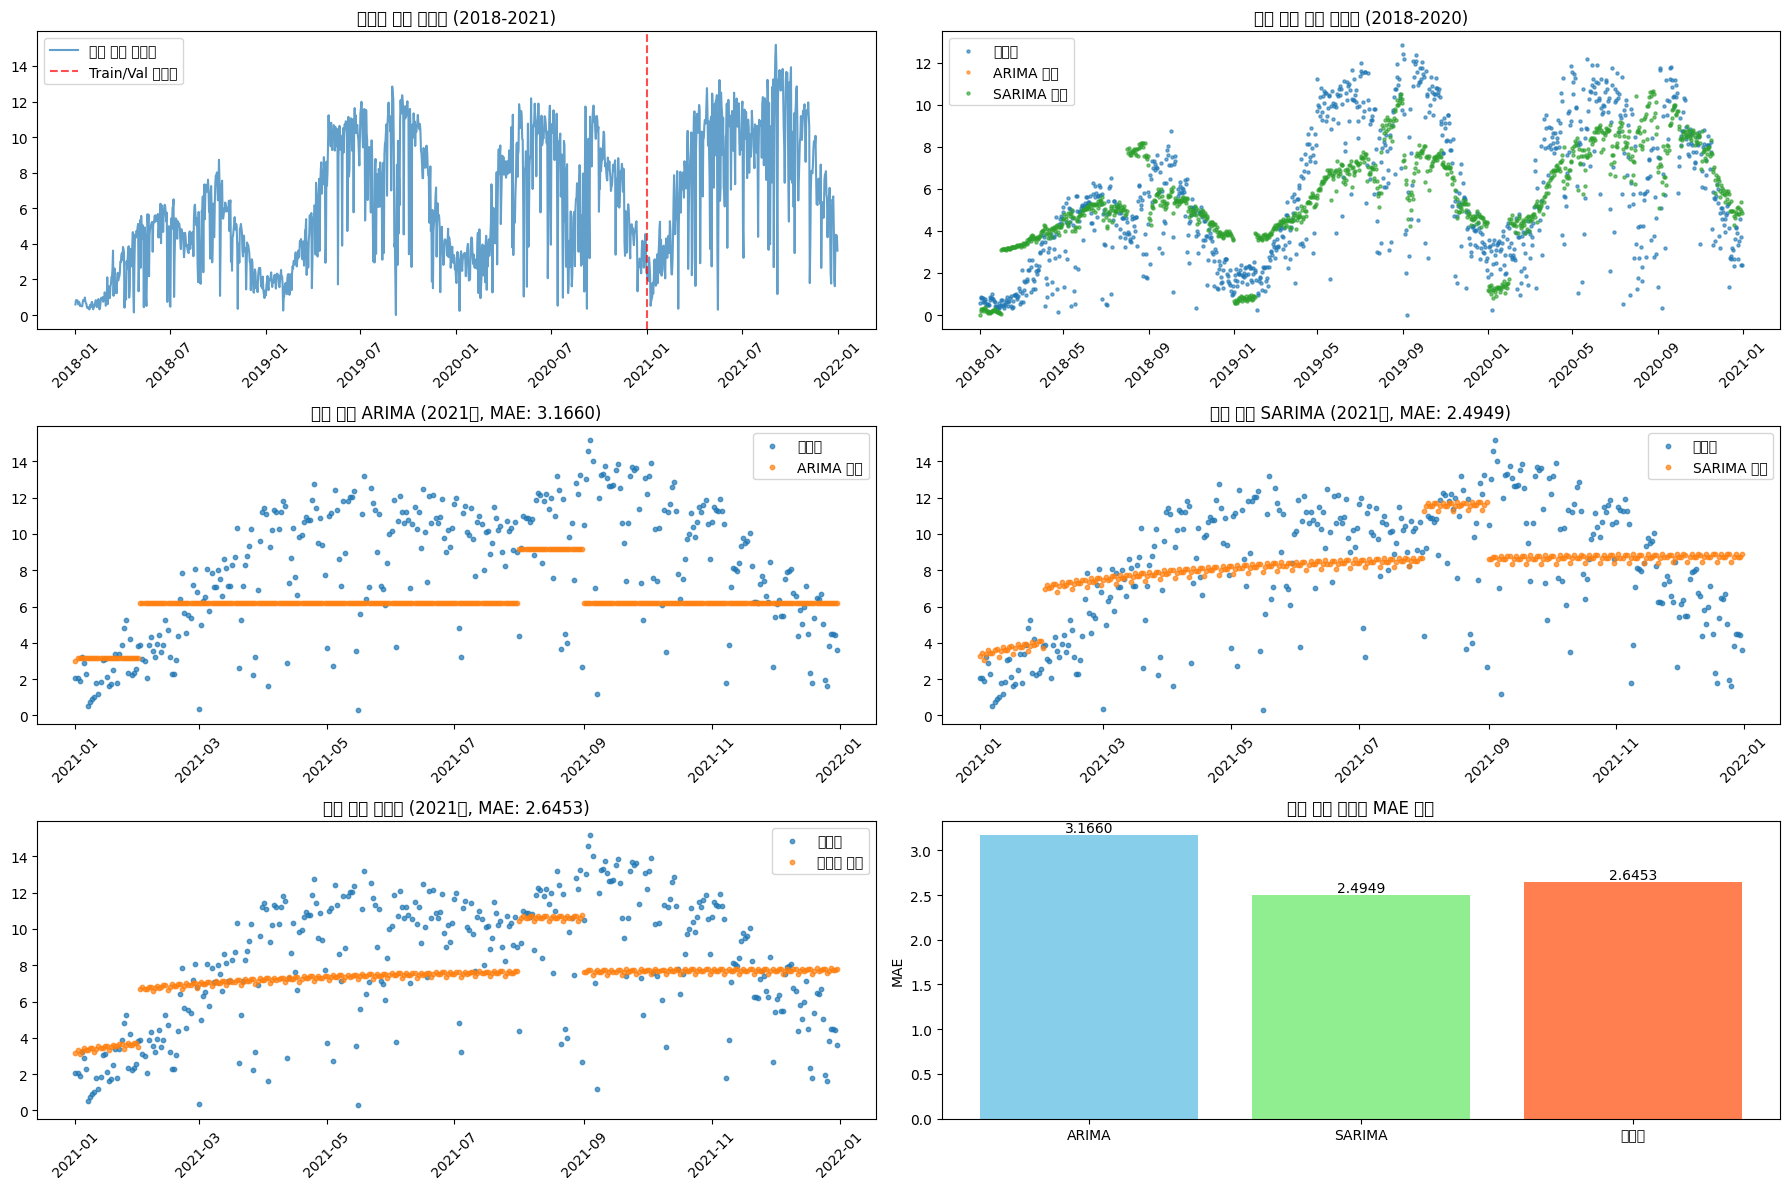

In [62]:
# 전체 데이터 시각화
print(f"전체 데이터 기간: {train['일시'].min()} ~ {train['일시'].max()}")
print(f"훈련 데이터 기간: {train_g['ds'].min()} ~ {train_g['ds'].max()}")
print(f"검증 데이터 기간: {val_g['ds'].min()} ~ {val_g['ds'].max()}")

fig, axes = plt.subplots(3, 2, figsize=(18, 12))

original_data = train.loc[:, ['일시', '광진구']].copy()
original_data.columns = ['ds', 'y']

axes[0, 0].plot(original_data['ds'], original_data['y'], alpha=0.7, label='전체 원본 데이터')
axes[0, 0].axvline(x=pd.to_datetime('2021-01-01'), color='red', linestyle='--', alpha=0.7, label='Train/Val 분할점')
axes[0, 0].set_title('광진구 전체 데이터 (2018-2021)')
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# 모델 적합도
train_fitted_arima = pd.DataFrame({
    'ds': train_g['ds'],
    'y': train_g['y'],
    'yhat': fitted_model.fittedvalues
})
train_fitted_arima['yhat_adjusted'] = train_fitted_arima.apply(lambda x: consider_month(x), axis=1)

train_fitted_sarima = pd.DataFrame({
    'ds': train_g['ds'],
    'y': train_g['y'],
    'yhat': sarima_model.get_fitted_values()
})
train_fitted_sarima['yhat_adjusted'] = train_fitted_sarima.apply(lambda x: consider_month(x), axis=1)

axes[0, 1].scatter(train_fitted_arima['ds'], train_fitted_arima['y'], s=5, alpha=0.6, label='실제값')
axes[0, 1].scatter(train_fitted_arima['ds'], train_fitted_arima['yhat_adjusted'], s=5, alpha=0.6, label='ARIMA 적합')
axes[0, 1].scatter(train_fitted_sarima['ds'], train_fitted_sarima['yhat_adjusted'], s=5, alpha=0.6, label='SARIMA 적합')
axes[0, 1].set_title('훈련 기간 모델 적합도 (2018-2020)')
axes[0, 1].legend()
axes[0, 1].tick_params(axis='x', rotation=45)

# Calculate yhat_adjusted for validation dataframes
val_comparison_arima['yhat_adjusted'] = val_comparison_arima.apply(lambda x: consider_month(x), axis=1)
val_comparison_sarima['yhat_adjusted'] = val_comparison_sarima.apply(lambda x: consider_month(x), axis=1)

# 예측 성능
axes[1, 0].scatter(val_comparison_arima['ds'], val_comparison_arima['y'], s=10, alpha=0.7, label='실제값')
axes[1, 0].scatter(val_comparison_arima['ds'], val_comparison_arima['yhat_adjusted'], s=10, alpha=0.7, label='ARIMA 예측')
axes[1, 0].set_title(f'검증 기간 ARIMA (2021년, MAE: {arima_performance["MAE"]:.4f})')
axes[1, 0].legend()
axes[1, 0].tick_params(axis='x', rotation=45)

axes[1, 1].scatter(val_comparison_sarima['ds'], val_comparison_sarima['y'], s=10, alpha=0.7, label='실제값')
axes[1, 1].scatter(val_comparison_sarima['ds'], val_comparison_sarima['yhat_adjusted'], s=10, alpha=0.7, label='SARIMA 예측')
axes[1, 1].set_title(f'검증 기간 SARIMA (2021년, MAE: {sarima_performance["MAE"]:.4f})')
axes[1, 1].legend()
axes[1, 1].tick_params(axis='x', rotation=45)

# 앙상블
axes[2, 0].scatter(val_comparison_ensemble['ds'], val_comparison_ensemble['y'], s=10, alpha=0.7, label='실제값')
axes[2, 0].scatter(val_comparison_ensemble['ds'], val_comparison_ensemble['yhat_ensemble'], s=10, alpha=0.7, label='앙상블 예측')
axes[2, 0].set_title(f'검증 기간 앙상블 (2021년, MAE: {ensemble_performance["MAE"]:.4f})')
axes[2, 0].legend()
axes[2, 0].tick_params(axis='x', rotation=45)

# 성능 비교
models = ['ARIMA', 'SARIMA', '앙상블']
mae_scores = [arima_performance['MAE'], sarima_performance['MAE'], ensemble_performance['MAE']]

axes[2, 1].bar(models, mae_scores, color=['skyblue', 'lightgreen', 'coral'])
axes[2, 1].set_title('검증 기간 모델별 MAE 비교')
axes[2, 1].set_ylabel('MAE')

for i, v in enumerate(mae_scores):
    axes[2, 1].text(i, v + 0.001, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [63]:
print("\n=== SARIMA 모델 최종 결과 ===")
print("\n각 구별 성능 요약:")
for district_name, performance in results.items():
    print(f"{district_name}: MAE {performance['MAE']:.6f}")

sarima_submission.to_csv('sarima_submission.csv', index=False)

print("\n SARIMA 예측값 통계")
for district_name in ['광진구', '동대문구', '성동구', '중랑구']:
    stats = sarima_submission[district_name].describe()
    print(f"\n{district_name}:")
    print(f"  평균: {stats['mean']:.3f}")
    print(f"  표준편차: {stats['std']:.3f}")
    print(f"  최소값: {stats['min']:.3f}")
    print(f"  최대값: {stats['max']:.3f}")

print("\n" + "="*50)
print("SARIMA 모델 분석 완료")
print("="*50)


=== SARIMA 모델 최종 결과 ===

각 구별 성능 요약:
Gwangjin: MAE 2.494864
Dongdaemun: MAE 2.535441
Seongdong: MAE 2.228622
Jungnang: MAE 1.608302

 SARIMA 예측값 통계

광진구:
  평균: 8.797
  표준편차: 1.314
  최소값: 5.453
  최대값: 11.964

동대문구:
  평균: 4.286
  표준편차: 1.248
  최소값: 0.999
  최대값: 7.499

성동구:
  평균: 7.796
  표준편차: 1.317
  최소값: 4.416
  최대값: 11.033

중랑구:
  평균: 3.782
  표준편차: 1.232
  최소값: 0.733
  최대값: 6.849

SARIMA 모델 분석 완료!
